In [95]:
import os

os.system("sh sample.sh")
data = raspi_import("data/adcData.bin")

0

In [75]:
from raspi_import import raspi_import

data = raspi_import("data/adcData.bin")

print(data[1])

[[3072    0    8 3824 1776]
 [  78   57 1959 2098 1972]
 [  41   14 2030 2036 1927]
 ...
 [  27    0 2148 2179 2114]
 [  26    0 2240 2117 1957]
 [  26    0 2250 2033 1847]]


In [94]:
import numpy as np
from numpy.lib.stride_tricks import as_strided
#import scipy.signal as sig

def _check_arg(x, xname):
    x = np.asarray(x)
    if x.ndim != 1:
        raise ValueError('%s must be one-dimensional.' % xname)
    return x

def crosscorrelation(x, y, maxlag):
    """
    Cross correlation with a maximum number of lags.

    `x` and `y` must be one-dimensional numpy arrays with the same length.

    This computes the same result as
        numpy.correlate(x, y, mode='full')[len(a)-maxlag-1:len(a)+maxlag]

    The return vaue has length 2*maxlag + 1.
    """
    x = _check_arg(x, 'x')
    y = _check_arg(y, 'y')
    py = np.pad(y.conj(), 2*maxlag, mode='constant')
    T = as_strided(py[2*maxlag:], shape=(2*maxlag+1, len(y) + 2*maxlag),
                   strides=(-py.strides[0], py.strides[0]))
    px = np.pad(x, maxlag, mode='constant')
    return T.dot(px)
def maxindex(array, maxlag):
    result = np.argmax(array)
    return result-maxlag
def signalAngel(arrMic1, arrMic2, arrMic3, maxlag):
    crosscorr1_2 = crosscorrelation(arrMic1, arrMic2, maxlag)
    crosscorr2_3 = crosscorrelation(arrMic2, arrMic3, maxlag)
    crosscorr3_1 = crosscorrelation(arrMic3, arrMic1, maxlag)
    print(crosscorr1_2)
    print(crosscorr2_3)
    print(crosscorr3_1)
    indexMax1_2 = maxindex(crosscorr1_2, maxlag)
    indexMax2_3 = maxindex(crosscorr1_2, maxlag)
    indexMax3_1 = maxindex(crosscorr1_2, maxlag)
    print(indexMax1_2)
    print(indexMax2_3)
    print(indexMax3_1)
    angel = np.arctan(np.sqrt(3)*(indexMax1_2+indexMax3_1)/(indexMax1_2-indexMax3_1-2*indexMax2_3))
    return angel
    

In [96]:
maxlag = 8
dcComp = 1986

mic1 = data[1][:,4].astype(np.int16)-dcComp
mic2 = data[1][:,3].astype(np.int16)-dcComp
mic3 = data[1][:,2].astype(np.int16)-dcComp

#print(data[1][:,4])
print(mic1)
print(mic2)
print(mic3)

print(signalAngel(mic1,mic2,mic3, maxlag))


[795  99 240 ... 231 147  97]
[830  50 -17 ... 240 251 292]
[ 730   42 -128 ...  289  316  423]
[  6496  32065  25186  15124  -3904  -3871 -15058  -7304   8938 -30837
  24197  18424  -3751  25515   2396  -2008   7773]
[-16979  32174   3115  -7863  14811  29225  -1109  25886  15870  11953
   8511  16686 -17656 -20365    661 -31304  15005]
[-10200  13525  30375  25261 -32759   5236 -30107 -18872   9126  11403
 -13835  -3018  27399  28356 -28426  31590  27425]
-7
-7
-7
-1.0471975511965976


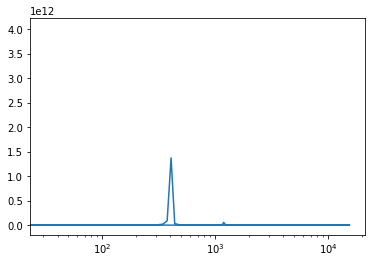

In [47]:
import matplotlib.pyplot as plt
import numpy as np

dataobj = data[1][:,2]
#print(dataobj)
t = np.arange(0,len(dataobj))
#t = np.arange(0,1,1/len(dataobj))
#print(t)
sp = np.fft.fft(dataobj)
freq = np.fft.fftfreq(dataobj.size, d=32e-6)
#freq = t
#print(sp.real)
plt.xscale('log')
#plt.yscale('log')
plt.plot(freq,abs(sp)**2)